<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [26]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def parameters(list):
  mean = sum(list) / len(list)
  var = sum((abs(x - mean))**2 for x in list) / (len(list) - 1)
  std = var**0.5
  return (mean, var, std)

print(parameters(sales))

(3052.714285714286, 214387.90476190473, 463.0204150595357)


In [37]:
# Check results
import pandas as pd

sales_df = pd.DataFrame(sales)
sales_df.describe()

,0
count,7.000000
mean,3052.714286
std,463.020415
min,2400.000000
25%,2743.500000
50%,3027.000000
75%,3377.500000
max,3700.000000


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [28]:
import numpy as np

customers = [127, 80, 105, 92, 120, 115, 93]

cov1 = np.cov(sales, customers)
cov1

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [62]:
print("standard deviation: for customers", parameters(customers)[2])

corr1 = cov1 / ((parameters(sales)[2])*((parameters(customers)[2])))
np.fill_diagonal(corr1, 1)
corr1

standard deviation: for customers 17.057326313123664


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [31]:
np.corrcoef(sales, customers)
# Not sure why this does not match. 

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

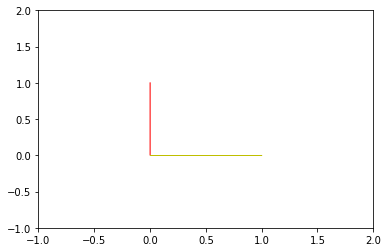

In [44]:
import matplotlib.pyplot as plt


a = [0,1]
b = [1,0]

fig = plt.figure()
plt.arrow(0,0,a[0],a[1],linewidth=0.5, color='r')
plt.arrow(0,0,b[0],b[1], linewidth=0.5, color='y')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()


  # perpendicular, unrelated 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [47]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a, b)

# Not orthogonal, because their dot product is not equal to 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [54]:
c = np.array([2, -15, 6, 20])

def norm(vector):
  return (sum(x**2 for x in vector))**0.5

print(norm(c)**2)
print(np.dot(c, c))
print(np.dot(c.T, c))

# All these values are the same. They're all the sum of the squares of the elements.

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## answer:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\\
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix}+ -8\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8 \hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [66]:
f = [4, 12, 11, 9, 2]

np.array(f) / norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-1, 2)

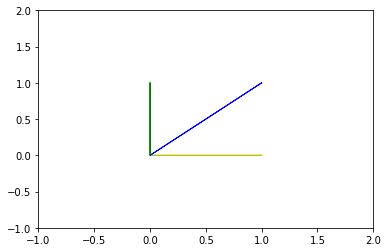

In [71]:
a = [1,0]
b = [1,1]
c = [0,1]

fig = plt.figure()
plt.arrow(0,0,a[0],a[1], color='y')
plt.arrow(0,0,b[0],b[1], color='b')
plt.arrow(0,0,c[0],c[1], linewidth = 1, color='g')
plt.xlim(-1,2)
plt.ylim(-1, 2)

# A and B are linearly dependent
# A and C are linearly independent

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

(-1, 10)

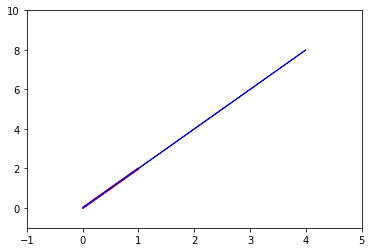

In [75]:
a = [1,2]
b = [4,8]


fig = plt.figure()
plt.arrow(0,0,a[0],a[1], linewidth=2, color='r')
plt.arrow(0,0,b[0],b[1], color='b')

plt.xlim(-1,5)
plt.ylim(-1, 10)

# The span is 1
# 4g = h
# So the two are scalar multiples of each other

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [108]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

array = np.array(l + m + n).reshape(3,3).T
array
np.linalg.matrix_rank(array)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



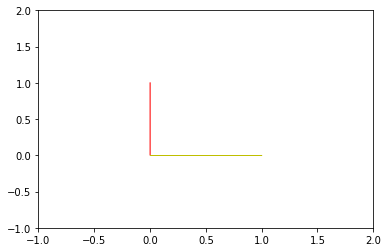

In [83]:
import matplotlib.pyplot as plt


a = [0,1]
b = [1,0]

fig = plt.figure()
plt.arrow(0,0,a[0],a[1],linewidth=0.5, color='r')
plt.arrow(0,0,b[0],b[1], linewidth=0.5, color='y')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()


  # perpendicular, unrelated 

## 6.2 What does it mean to form a basis?

A set of vectors is a basis of a vector space V if and only if they are linearly independent and span V.

And orthonormal basis is a basis in which all the basis vectors have a norm of 1 (they are unit vectors). 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [101]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It tells us the dimension of the vector space spanned by its columns. In this case, the matrix occupies a 2-dimensional subspace of R^3.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

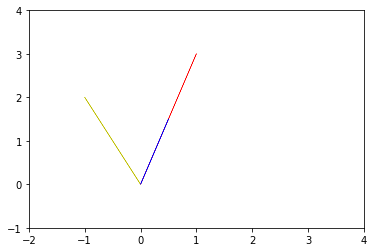

In [121]:
v = np.array([1,3])
w = np.array([-1,2])

u = v * np.dot(v, w) / np.dot(v, v)

fig = plt.figure()
plt.arrow(0,0,v[0],v[1],linewidth=0.5, color='r')
plt.arrow(0,0,w[0],w[1], linewidth=0.5, color='y')
plt.arrow(0,0,u[0],u[1], linewidth=0.5, color='b')
plt.xlim(-2,4)
plt.ylim(-1,4)
plt.show()


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

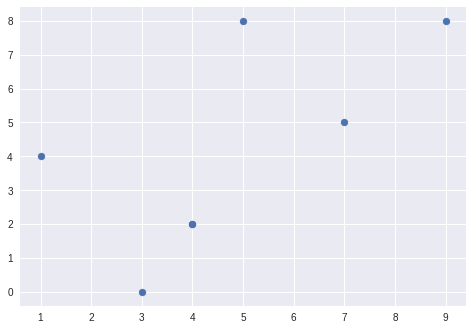

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()